OLD NOTEBOOK: SEE osm_pbf_power_data_extractor.py which does everything.

In [1]:
import os, sys, time

import requests
import shutil

# https://gitlab.com/dlr-ve-esy/esy-osmfilter/-/tree/master/
from esy.osmfilter import  osm_colors          as CC
from esy.osmfilter import run_filter, Node,Way,Relation 
from esy.osmfilter import export_geojson
from contextlib import contextmanager

import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import geoplot
import matplotlib.pyplot as plt
# import logging
# logging.basicConfig()
# logger=logging.getLogger(__name__)
# logger.setLevel(logging.INFO)
# logger.setLevel(logging.WARNING)


In [2]:
geofabrik_regions = ["algeria","angola","benin","botswana","burkina_faso","burundi","cameroon","canary_islands","cape_verde","central_african_republic","chad","comores","congo_brazzaville","congo_democratic_republic","djibouti","egypt","equatorial_guinea","eritrea","ethiopia","gabon","ghana","guinea_bissau","guinea","ivory_coast","kenya","lesotho","liberia","libya","madagascar","malawi","mali","mauritania","mauritius","morocco","mozambique","namibia","niger","nigeria","rwanda","saint_helena_ascension_and_tristan_da_cunha","sao_tome_and_principe","senegal_and_gambia","seychelles","sierra_leone","somalia","south_africa_and_lesotho","south_africa","south_sudan","sudan","swaziland","tanzania","togo","tunisia","uganda","zambia","zimbabwe"]

In [7]:
country_name = 'egypt' # TODO: Create dictionary with country_code : country_name pairs
country_code = 'egypt'
update = False # prevents re-download and filteration of file
element_file_exists = False

# json file for the Data dictionary 
# json file for the Elements dictionary is automatically written to 'data/osm/Elements'+filename)
JSON_outputfile = os.path.join(os.getcwd(),'data','osm',country_name+'_substations.json')

if os.path.exists(JSON_outputfile):
    element_file_exists = True

geofabrik_filename=f'{country_name}-latest.osm.pbf' # Filename for geofabrik 
geofabrik_url = f'https://download.geofabrik.de/africa/{geofabrik_filename}' # https://download.geofabrik.de/africa/nigeria-latest.osm.pbf

PBF_inputfile = os.path.join(os.getcwd(),"data","osm","pbf",geofabrik_filename) # Input filepath

if not os.path.exists(PBF_inputfile) or update or element_file_exists is False:
    print(f"{geofabrik_filename} does not exist, downloading to {PBF_inputfile}")
    os.makedirs(os.path.dirname(PBF_inputfile), exist_ok=True) # create data/osm directory
    with requests.get(geofabrik_url, stream=True) as r:
        with open(PBF_inputfile, 'wb') as f:
            shutil.copyfileobj(r.raw, f)





egypt-latest.osm.pbf does not exist, downloading to /home/max/OneDrive/PHD-Flexibility/07_pypsa-africa/0github/pypsa-africa/data_exploration/data/osm/pbf/egypt-latest.osm.pbf


In [9]:
print(PBF_inputfile, JSON_outputfile)

/home/max/OneDrive/PHD-Flexibility/07_pypsa-africa/0github/pypsa-africa/data_exploration/data/osm/pbf/egypt-latest.osm.pbf /home/max/OneDrive/PHD-Flexibility/07_pypsa-africa/0github/pypsa-africa/data_exploration/data/osm/egypt_substations.json


In [10]:
#see https://dlr-ve-esy.gitlab.io/esy-osmfilter/filter.html for filter structures

prefilter = {Node: {"power":["substation"]}, Way: {"power":["substation"]}, Relation: {"power":["substation"]}}
blackfilter = [("pipeline","substation"),] # HACKY: due to esy.osmfilter
whitefilter =[[("power","substation"),],]
    
elementname=f'{country_code}_substations'

if update is False or element_file_exists is False:
    create_elements = False # Do not create elements again
    new_prefilter_data = False #Do not pre-filter data again
    print("Loading Pickle")
else :
    create_elements = True # Do not create elements again
    new_prefilter_data = True #Do not pre-filter data again
    print("Creating  New Elements")

[Data,Elements]=run_filter(elementname,PBF_inputfile, JSON_outputfile,prefilter,whitefilter,blackfilter, NewPreFilterData=new_prefilter_data, CreateElements=create_elements, LoadElements=True,verbose=False,multiprocess=True)

# export the elements to a geojson-file
# export_geojson(Elements[elementname]['Way'],Data,filename='test.geojson',jsontype='Line')
# convert extract node elements
# export_geojson(Elements[elementname]['Node'],Data,filename='test.geojson',jsontype='Point')

INFO:esy.osmfilter.pre_filter:PreFilter OSM GAS DATA
INFO:esy.osmfilter.pre_filter:InputFile     : /home/max/OneDrive/PHD-Flexibility/07_pypsa-africa/0github/pypsa-africa/data_exploration/data/osm/pbf/egypt-latest.osm.pbf
INFO:esy.osmfilter.pre_filter:Size          : 150194          kbyte
INFO:esy.osmfilter.pre_filter:Estimated Time: 21.46           s
INFO:esy.osmfilter.pre_filter:=============================


Creating  New Elements


INFO:esy.osmfilter.pre_filter:0.5
INFO:esy.osmfilter.pre_filter:1
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilt

In [58]:
df_way = pd.json_normalize(Elements[elementname]["Way"].values())
#df_way.dropna(subset=['tags.voltage'], inplace = True) # Drop any substations with Voltage = N/A
# na_values_voltage = df_way.isna().sum()
df_way.dropna(thresh=len(df_way)*0.25, axis=1, how='all', inplace = True) #Drop Columns with 75% values as N/A
display(df_way)

id                                               refs  tags.power  \
0    502403974  [4928886184, 4928886177, 4928888362, 492888618...  substation   
1     98663507  [1141417579, 1141418935, 1141416688, 114141823...  substation   
2    426825796  [4260909683, 4260909680, 4260909682, 426090968...  substation   
3    502403977  [4928889486, 4928889487, 4928889480, 492888948...  substation   
4    501748213  [4924621049, 4924621043, 4924621044, 492462105...  substation   
..         ...                                                ...         ...   
578  502404006  [4928887079, 4928887073, 4928887071, 492888707...  substation   
579  502109016  [4926899832, 4926899827, 4926899828, 492689983...  substation   
580  426596393  [4258781556, 4258781553, 4258781552, 425878155...  substation   
581  901384779  [8373508589, 8373508590, 8373508591, 837350859...  substation   
582  127222463  [1408712930, 1408712934, 1408712936, 140871292...  substation   

     tags.voltage tags.location tags.substation  
0             NaN           NaN             NaN  
1    220000;66000       outdoor    transmission  
2             NaN           NaN             NaN  
3             NaN           NaN             NaN  
4             NaN           NaN             NaN  
..            ...           ...             ...  
578           NaN           NaN             NaN  
579           NaN           NaN             NaN  
580         66000       outdoor      transition  
581           NaN           NaN             NaN  
582           NaN           NaN             NaN  

[583 rows x 6 columns]

In [59]:
df_node = pd.json_normalize(Elements[elementname]["Node"].values())
df_node.dropna(thresh=len(df_node)*0.25, axis=1, how='all', inplace = True) #Drop Columns with 75% values as N/A
display(df_node)


id                                    lonlat  \
0  5188682766  [31.216063500000004, 30.066895700000007]   
1  3268909102   [30.619544999999896, 29.25690170000007]   
2  2296854952  [30.459881800000087, 31.038109799999873]   

                          tags.note  tags.power tags.building tags.location  \
0  natural gas distribution cabinet  substation           yes       outdoor   
1                               NaN  substation           NaN           NaN   
2                               NaN  substation           NaN           NaN   

  tags.substation               tags.name  
0    distribution                     NaN  
1             NaN  West Fayoum Substation  
2             NaN                     NaN

In [60]:
from shapely.geometry import Polygon

polygon = Polygon([(0, 0), (1, 1), (1, 0)])
polygon.area
polygon.length


3.414213562373095

[(31.32028580000014, 29.774966000000052), (31.32014570000014, 29.774471100000056), (31.321250600000106, 29.77423540000006)]


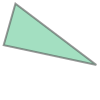

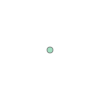

In [61]:
from shapely.geometry import Polygon

df = []

r = [4928886184, 4928886177, 4928888362]
for element in r:
    x = Data["Node"][str(element)]["lonlat"]
    x = tuple(x)
    df.append(x)

print(df)

display(Polygon(df))
display(Polygon(df).centroid)

In [62]:
# Convert Ways to Nodes
lonlat_column =[]
for ref in df_way["refs"]:
    lonlats =[]
    for r in ref:
        lonlat = Data["Node"][str(r)]["lonlat"]  #"r" is the ID in Data["Node"], ["lonlat"] a list of [x1,y1] (coordinates)
        lonlat = tuple(lonlat)
        lonlats.append(lonlat) # a list with tuples
    lonlat_column.append(lonlats) # adding a new list of tuples every row
df_way.drop('refs',axis=1,inplace=True)
df_way.insert(1,"lonlat", lonlat_column)
df_way['geometry1'] = df_way['lonlat'].apply(lambda x: Polygon(x))
df_way['geometry2'] = df_way['lonlat'].apply(lambda x: Polygon(x).centroid)
display(df_way)
    
# polygon_column=[]
# for poly_list in lonlat_column:
#     for p in poly_list:
#         print(p)

#     print("p")
    

id                                             lonlat  tags.power  \
0    502403974  [(31.32028580000014, 29.774966000000052), (31....  substation   
1     98663507  [(30.615645899999976, 29.255140100000066), (30...  substation   
2    426825796  [(32.69832189999986, 25.200866499999872), (32....  substation   
3    502403977  [(31.287348600000115, 29.944123100000066), (31...  substation   
4    501748213  [(31.215325900000142, 30.68306600000006), (31....  substation   
..         ...                                                ...         ...   
578  502404006  [(31.102472000000134, 29.34798330000006), (31....  substation   
579  502109016  [(31.1600642000001, 30.140226600000073), (31.1...  substation   
580  426596393  [(32.361630699999935, 26.063221099999964), (32...  substation   
581  901384779  [(31.530598200000004, 29.93907439999996), (31....  substation   
582  127222463  [(31.57526320000003, 31.395184600000068), (31....  substation   

     tags.voltage tags.location tags.substation  \
0             NaN           NaN             NaN   
1    220000;66000       outdoor    transmission   
2             NaN           NaN             NaN   
3             NaN           NaN             NaN   
4             NaN           NaN             NaN   
..            ...           ...             ...   
578           NaN           NaN             NaN   
579           NaN           NaN             NaN   
580         66000       outdoor      transition   
581           NaN           NaN             NaN   
582           NaN           NaN             NaN   

                                             geometry1  \
0    POLYGON ((31.32028580000014 29.77496600000005,...   
1    POLYGON ((30.61564589999998 29.25514010000007,...   
2    POLYGON ((32.69832189999986 25.20086649999987,...   
3    POLYGON ((31.28734860000012 29.94412310000007,...   
4    POLYGON ((31.21532590000014 30.68306600000006,...   
..                                                 ...   
578  POLYGON ((31.10247200000013 29.34798330000006,...   
579  POLYGON ((31.1600642000001 30.14022660000007, ...   
580  POLYGON ((32.36163069999994 26.06322109999996,...   
581  POLYGON ((31.5305982 29.93907439999996, 31.529...   
582  POLYGON ((31.57526320000003 31.39518460000007,...   

                                       geometry2  
0    POINT (31.32076821247585 29.77460068246127)  
1    POINT (30.61818648403827 29.25549483873722)  
2    POINT (32.69910617005267 25.20087048457793)  
3    POINT (31.28817625413214 29.94373128430915)  
4     POINT (31.21630404284637 30.6824339795446)  
..                                           ...  
578  POINT (31.10110638167849 29.34698561894191)  
579   POINT (31.1602252500001 30.14015080000008)  
580   POINT (32.3616905843821 26.06314628616937)  
581  POINT (31.53064105411272 29.93833928404823)  
582  POINT (31.57580540000003 31.39482230000007)  

[583 rows x 8 columns]

In [57]:
gdf = gpd.GeoDataFrame(df_way, geometry=[Point(x, y) for x, y in df_way.lonlat])
gdf.drop(columns=['lonlat'], inplace=True)
display(gdf)

id  tags.power          tags.voltage tags.location  \
0      90137992  substation                 66000       outdoor   
2     219596292  substation                 88000       outdoor   
5     694348420  substation                110000       outdoor   
6     302904657  substation                110000       outdoor   
9      90454383  substation  400000;220000;132000       outdoor   
...         ...         ...                   ...           ...   
6818  223115963  substation                220000       outdoor   
6819  302127350  substation                161000       outdoor   
6822  695523467  substation                 66000           NaN   
6824  204050015  substation                132000       outdoor   
6825  840356742  substation                225000           NaN   

     tags.substation              tags.name                    geometry  
0       distribution                    NaN  POINT (27.79326 -32.98251)  
2       distribution                    NaN  POINT (30.68761 -27.96401)  
5         industrial                    NaN   POINT (13.85354 -4.14474)  
6       transmission                  Nkayi   POINT (13.28918 -4.17355)  
9       transmission  Grassridge Substation  POINT (25.63269 -33.71928)  
...              ...                    ...                         ...  
6818    transmission   محطة فرعية وادي حلفا   POINT (31.42202 21.77425)  
6819             NaN        Tafo Substation    POINT (-0.36905 6.20941)  
6822             NaN                    NaN    POINT (4.47037 35.70368)  
6824    distribution                    NaN  POINT (26.83819 -27.95507)  
6825             NaN        Soma substation  POINT (-15.52460 13.43895)  

[2721 rows x 7 columns]

In [60]:
GeoJSON_outputfile = os.path.join(os.getcwd(),'data','osm',country_name+'_substations.geojson')
gdf.to_file(GeoJSON_outputfile, driver="GeoJSON")  

In [61]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
saudi = world.query('name == "Saudi Arabia"')
yemen = world.query('name == "Yemen"')
iraq = world.query('name == "Iraq"')
oman = world.query('name == "Oman"')
uae = world.query('name == "United Arab Emirates"')
jordan = world.query('name == "Jordan"')
palestine = world.query('name == "Palestine"')
israel = world.query('name == "Israel"')
qatar = world.query('name == "Qatar"')
kuwait = world.query('name == "Kuwait"')
mena = saudi.append(yemen).append(iraq).append(oman).append(uae).append(jordan).append(palestine).append(israel).append(qatar).append(kuwait)
africa = world.query('continent == "Africa"').append(mena)

In [63]:
url = 'https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/144823/africagrid20170906final.geojson'
africa_network = gpd.read_file(url)
africa_substations = gpd.read_file(GeoJSON_outputfile)

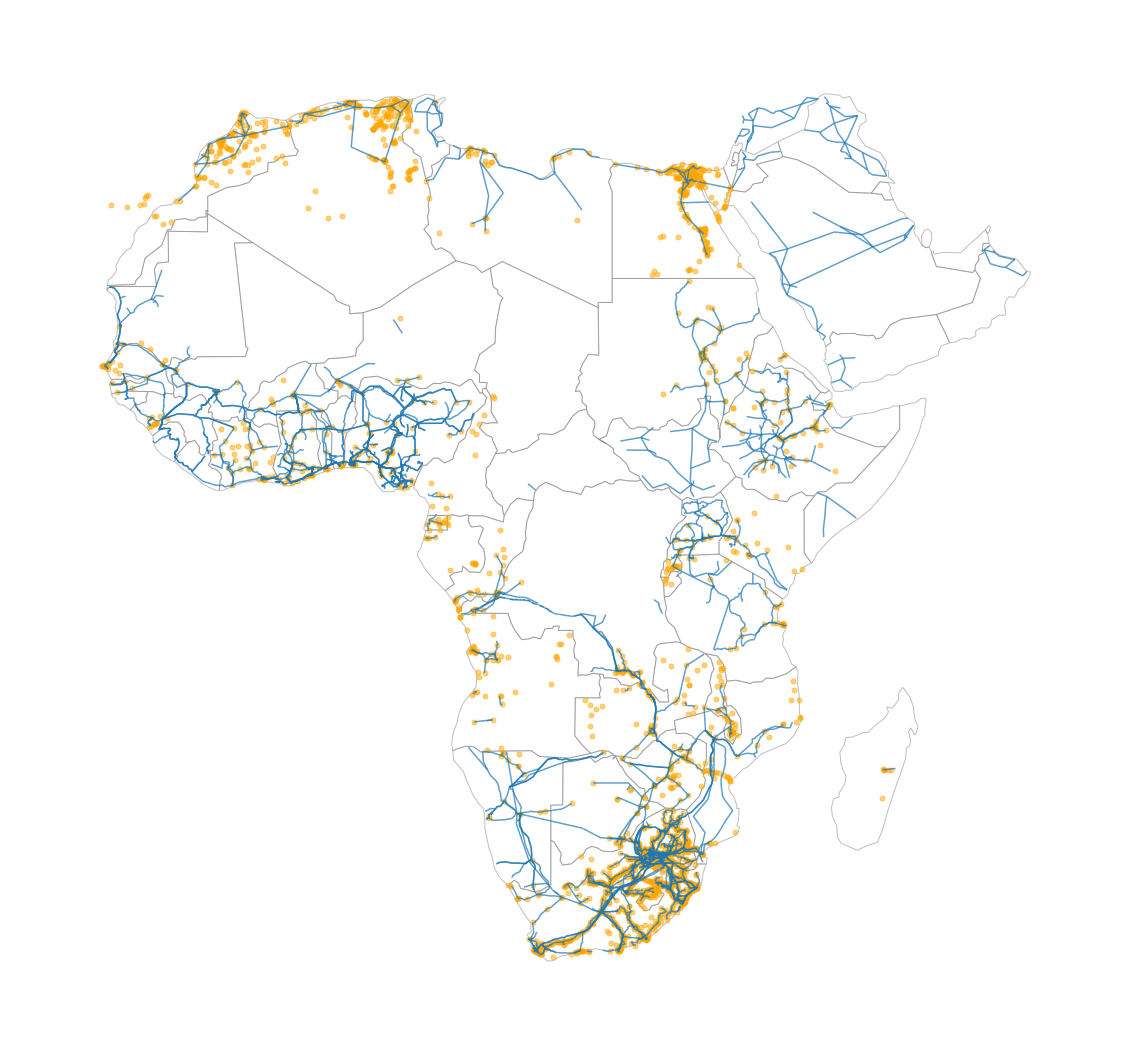

In [64]:
ax = africa_network[africa_network.voltage_kV > 110].plot(figsize=(20, 20),alpha = 0.7)
geoplot.polyplot(africa ,edgecolor='grey', ax=ax, alpha = 0.5)
africa_substations.plot(figsize=(20, 20),markersize=25, color='orange',alpha = 0.5, ax=ax)
plt.savefig('africa_transmission_and substations_110.png')